# Project Part 1

Jay Patwardhan, Vikram Pasupathy, Shivam Misra

In [ ]:
# Start writing code here...
import numpy as np
import pandas as pd
import scipy.integrate as integrate
from sklearn.metrics import mean_squared_error

In [ ]:
x = np.load('part1a.npz')
x.files

['N', 'Svc_0_pmf', 'Lc', 'Ic_0', 'gamma']

# Part a

## 1.

I will now code my ODE system in order to plot for 120 days for this single node.

In [ ]:
def ode_function(t, Y, beta, gamma):
    #print(gamma)
    #print(the_array)
    SVC = Y[:16].reshape(4,4)
    I_arr = Y[16:20]
    R_arr = Y[-1]
    # dS stored as: v are rows, c are columns
    """
    for i in range(4):
        for j in range(4):
            dS.append(-(beta[i][j]*SVC[i][j]*np.sum(x['Ic_0'])/N))
    """
    dS = -(beta*SVC*sum(I_arr))/N

    """
    for col in range(4):
        summ = 0
        for row in range(4):
            summ+=dS[row][col]
        dI.append(-1*(summ+gamma*x['Ic_0'][col]))
    """

    
    dI = (-np.sum(dS, axis=0)-gamma*I_arr)
    
    #print(dS)
    dR = [gamma*np.sum(I_arr)]
    dS = dS.reshape(1,16)
    dS = list(dS[0])
    #print(dI)
    dI = list(dI)
    

    #print(dS)
    #print(dI)
    #print(dR)

    new_arr = np.concatenate((dS, dI, dR), axis = 0)
    #print(new_arr)
    
    return new_arr

In [ ]:

gamma = x['gamma']
beta = np.linspace(0.05, 0.99, 16).reshape(4,4)
SVC = x['Svc_0_pmf']*N
I_arr = x['Ic_0']

SVC = (x['Svc_0_pmf'].reshape(1,16))*(N-np.sum(I_arr)) #get total number of people in each sub category
I_init = x['Ic_0'].reshape(4)
R_init = np.array([0])

#print(SVC)
#print(I_init)
#print(R_init)

#print(SVC[0], 'SVC')
SIRModel_init = np.concatenate((SVC[0], I_init, R_init))



#solve the ODE
t_eval = np.linspace(0,119,120)
# solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)[source]
ans = integrate.solve_ivp(ode_function, (0,120), SIRModel_init, args = (beta,gamma), t_eval=t_eval)




In [ ]:
ans.y.shape

(21, 120)

2. Here are the overall S,I,R values, I will also compute the value of L here.

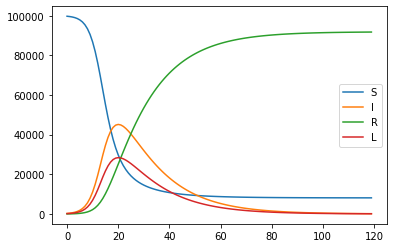

In [ ]:
import matplotlib.pyplot as plt




S = ans.y[:16]
I = ans.y[16:20]
R = ans.y[-1]

#compute L
L_vals = x['Lc']
L = []
for i in range(120):
    summ = 0
    for j in range(4):
        summ+=(I[j][i]*L_vals[j])
    L.append(summ)

    

S_sum = [np.sum(S, axis=0)]
I_sum = np.sum(I,axis=0)

plt.plot(S_sum[0], label='S')
plt.plot(I_sum, label='I')
plt.plot(R, label='R')
plt.plot(L, label='L')
plt.legend()
plt.show()




 Now, I will plot all $S_{v,c}$ and $I_{c}$ values over time on the same plot.

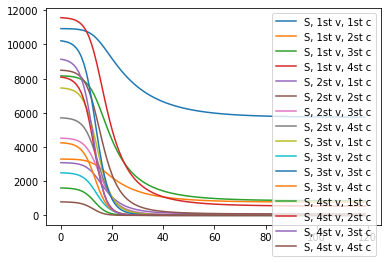

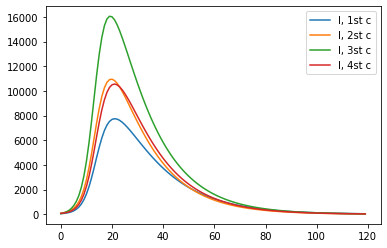

In [ ]:
row = 1
for i in range(16):
    if (i+1)%4==0:
        col = 4
    else:
        col = (i+1)%4
    plt.plot(S[i], label = f'S, {row}st v, {col}st c')
    if (i+1)%4==0:
        row+=1
plt.legend()
plt.show()

for i in range(4):
    plt.plot(I[i], label = f'I, {i+1}st c')
plt.legend()
plt.show()



3. In our graph, S, I, and R stand for Susceptible, Infected, and Recovered Populations respectively. The shapes of these curves are as expected - infections start to go up until the maximum capacity for infection is reached. Susceptible populations decrease over time and flatten out as either the population is infected or the infection rate decreases, and the recovered rate increases to match those who were infected (this model assumes recovery after infection). 
The infected curve is what is mentioned when people refer to "flattening the curve". The faster the curve decreases and starts to flatten, the faster the recovery rate increases.

4. The infecfted compartments converges to zero as time goes on, since the infected rate decreases to a stop in the end. The same goes for the susceptiblity curve, where the population at the end is either still susceptible (not infected), or has recovered. The recovered rate converges to a positive value when the infected rate reaches zero, as that will be the amount of people recovered from an infection. S + I + R = N, where N is the total population.

5. 

In [ ]:

SVC = (x['Svc_0_pmf'].reshape(1,16))*(N-np.sum(I_arr)) #get total number of people in each sub category


In [ ]:
v = 1
for i in range(16):
    c = (i+1)%4 if (i+1)%4!=0 else 4
    print(f'v value #{v}, c value #{c}', (SVC[0][i] - S[i][119])/(SVC[0][i]))
    if (i+1)%4 == 0:
        v+=1

v value #1, c value #1 0.47396828894118603
v value #1, c value #2 0.764839248111575
v value #1, c value #3 0.8948659477030321
v value #1, c value #4 0.9529938416097274
v value #2, c value #1 0.9789812333127478
v value #2, c value #2 0.9906003688989842
v value #2, c value #3 0.9957958469006083
v value #2, c value #4 0.9981192577970348
v value #3, c value #1 0.9991584244837216
v value #3, c value #2 0.9996232787197316
v value #3, c value #3 0.999831268858732
v value #3, c value #4 0.9999243584800263
v value #4, c value #1 0.9999660415601817
v value #4, c value #2 0.9999847197848113
v value #4, c value #3 0.999993099446986
v value #4, c value #4 0.999996866101293


6.

In [ ]:
t_eval2 = np.linspace(0,119,120)
# solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)[source]
ans2 = integrate.solve_ivp(ode_function, (0,120), SIRModel_init, args = (beta*0.25,gamma), t_eval=t_eval)




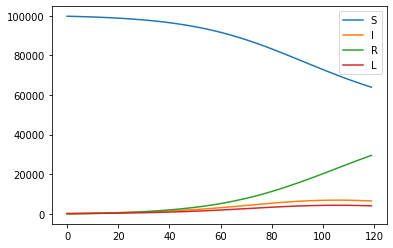

In [ ]:
S2 = ans2.y[:16]
I2 = ans2.y[16:20]
R2 = ans2.y[-1]

#compute L
L_vals2 = x['Lc']
L2 = []
for i in range(120):
    summ = 0
    for j in range(4):
        summ+=(I2[j][i]*L_vals2[j])
    L2.append(summ)

    

S_sum2 = [np.sum(S2, axis=0)]
I_sum2 = np.sum(I2,axis=0)

plt.plot(S_sum2[0], label='S')
plt.plot(I_sum2, label='I')
plt.plot(R2, label='R')
plt.plot(L2, label='L')
plt.legend()
plt.show()

The S, I, and R plots 

# Part 1(b)

## Part 1

I will now find the best betas for each node and compare them to the ground truth to make sure they were correctly found.


In [ ]:
x = np.load('part1b.npz')

N = x['N']
x.files



['N', 'Lc', 'Ic_0', 'gamma', 'L_validation', 'L_test', 'betas_validation']

In [ ]:
x['Lc']

##Susceptible Population
otwogroup = np.outer(N-(x['Ic_0'][0:5]).sum(axis=1),(0.5, 0.3, 0.1, 0.1))
ofourgroup = np.outer(N-(x['Ic_0'][5:10]).sum(axis=1),(0.4, 0.3, 0.2, 0.1)) 
osixgroup = np.outer(N-(x['Ic_0'][10:15]).sum(axis=1),(0.3, 0.3, 0.2, 0.2)) 
oeightgroup = np.outer(N-(x['Ic_0'][15:20]).sum(axis=1),(0.1, 0.2, 0.3, 0.4))

print(otwogroup)

[[24873.5 14924.1  4974.7  4974.7]
 [24868.5 14921.1  4973.7  4973.7]
 [24909.  14945.4  4981.8  4981.8]
 [24900.  14940.   4980.   4980. ]
 [24916.  14949.6  4983.2  4983.2]]


In [ ]:
def ode_functionForPartB(t, Y, beta, gamma):
    #print(gamma)
    #print(the_array)
    SVC = Y[:4]
    I_arr = Y[4:8]
    R_arr = Y[-1]
    # dS stored as: v are rows, c are columns
    """
    for i in range(4):
        for j in range(4):
            dS.append(-(beta[i][j]*SVC[i][j]*np.sum(x['Ic_0'])/N))
    """
    dS = -(beta*SVC*sum(I_arr))/N

    """
    for col in range(4):
        summ = 0
        for row in range(4):
            summ+=dS[row][col]
        dI.append(-1*(summ+gamma*x['Ic_0'][col]))
    """

    
    dI = (-1*dS-gamma*I_arr)
    
    #print(dS)
    dR = [gamma*np.sum(I_arr)]
    dS = dS.reshape(1,4)
    dS = list(dS[0])
    #print(dI)
    dI = list(dI)
    

    #print(dS)
    #print(dI)
    #print(dR)

    new_arr = np.concatenate((dS, dI, dR), axis = 0)
    #print(new_arr)
    
    return new_arr

In [ ]:
from itertools import product

msemin = float('inf')
minbetas = None

msemin2 = float('inf')
minbetas2 = None

msemin3 = float('inf')
minbetas3 = None

msemin4 = float('inf')
minbetas4 = None


grd = np.linspace(0,1,21)
for beta1, beta2, beta3, beta4 in product(grd,grd,grd,grd):
    if beta1 < beta2 < beta3 < beta4:
        beta = [beta1, beta2, beta3, beta4]
        mse = 0
        mse2 = 0
        mse3 = 0
        mse4 = 0
        for i in range(5):
            array = np.concatenate((otwogroup[i], x['Ic_0'][i], np.array([0])))
            t_eval = np.linspace(0,19,20)
            ans = integrate.solve_ivp(ode_functionForPartB, (0,20), array, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated = (ans.y[4:8].T) @ x['Lc']
            mse += mean_squared_error(L_estimated, x['L_validation'][i])

            array2 = np.concatenate((ofourgroup[i], x['Ic_0'][i+5], np.array([0])))
            ans2 = integrate.solve_ivp(ode_functionForPartB, (0,20), array2, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated2 = (ans2.y[4:8].T) @ x['Lc']
            mse2 += mean_squared_error(L_estimated2, x['L_validation'][i+5])

            array3 = np.concatenate((osixgroup[i], x['Ic_0'][i+10], np.array([0])))
            ans3 = integrate.solve_ivp(ode_functionForPartB, (0,20), array3, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated3 = (ans3.y[4:8].T) @ x['Lc']
            mse3 += mean_squared_error(L_estimated3, x['L_validation'][i+10])

            array4 = np.concatenate((oeightgroup[i], x['Ic_0'][i+15], np.array([0])))
            ans4 = integrate.solve_ivp(ode_functionForPartB, (0,20), array4, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated4 = (ans4.y[4:8].T) @ x['Lc']
            mse4 += mean_squared_error(L_estimated4, x['L_validation'][i+15])
        
        
        if mse < msemin:
            msemin = mse
            minbetas = beta
        if mse2 < msemin2:
            msemin2 = mse2
            minbetas2 = beta
        if mse3 < msemin3:
            msemin3 = mse3
            minbetas3 = beta
        if mse4 < msemin4:
            msemin4 = mse4
            minbetas4 = beta



print('First group best betas: ', minbetas)
print('First group validation betas:', x['betas_validation'][0])

print('Second group best betas:',minbetas2)
print('Second group validation betas:',x['betas_validation'][1])

print('Third group best betas: ', minbetas3)
print('Third group validation betas:', x['betas_validation'][2])

print('Fourth group best betas:', minbetas4)
print('Fourth group validation betas:', x['betas_validation'][3])

First group best betas:  [0.1, 0.15000000000000002, 0.2, 0.25]
First group validation betas: [0.1  0.15 0.2  0.25]
Second group best betas: [0.2, 0.25, 0.30000000000000004, 0.4]
Second group validation betas: [0.2  0.25 0.3  0.4 ]
Third group best betas:  [0.35000000000000003, 0.45, 0.5, 0.6000000000000001]
Third group validation betas: [0.35 0.45 0.5  0.6 ]
Fourth group best betas: [0.4, 0.5, 0.6000000000000001, 0.8]
Fourth group validation betas: [0.4 0.5 0.6 0.8]


## Conclusions

As we can see from the output, the grid search correctly found us the best beta values.


## Part 2

I will now use the test data and estimate the beta values.


In [ ]:
from itertools import product

msemin = float('inf')
minbetas = None

msemin2 = float('inf')
minbetas2 = None

msemin3 = float('inf')
minbetas3 = None

msemin4 = float('inf')
minbetas4 = None


grd = np.linspace(0,1,21)
for beta1, beta2, beta3, beta4 in product(grd,grd,grd,grd):
    if beta1 < beta2 < beta3 < beta4:
        beta = [beta1, beta2, beta3, beta4]
        mse = 0
        mse2 = 0
        mse3 = 0
        mse4 = 0
        for i in range(5):
            array = np.concatenate((otwogroup[i], x['Ic_0'][i], np.array([0])))
            t_eval = np.linspace(0,19,20)
            ans = integrate.solve_ivp(ode_functionForPartB, (0,20), array, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated = (ans.y[4:8].T) @ x['Lc']
            mse += mean_squared_error(L_estimated, x['L_test'][i])

            array2 = np.concatenate((ofourgroup[i], x['Ic_0'][i+5], np.array([0])))
            ans2 = integrate.solve_ivp(ode_functionForPartB, (0,20), array2, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated2 = (ans2.y[4:8].T) @ x['Lc']
            mse2 += mean_squared_error(L_estimated2, x['L_test'][i+5])

            array3 = np.concatenate((osixgroup[i], x['Ic_0'][i+10], np.array([0])))
            ans3 = integrate.solve_ivp(ode_functionForPartB, (0,20), array3, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated3 = (ans3.y[4:8].T) @ x['Lc']
            mse3 += mean_squared_error(L_estimated3, x['L_test'][i+10])

            array4 = np.concatenate((oeightgroup[i], x['Ic_0'][i+15], np.array([0])))
            ans4 = integrate.solve_ivp(ode_functionForPartB, (0,20), array4, args = (beta,x['gamma']), t_eval=t_eval)
            L_estimated4 = (ans4.y[4:8].T) @ x['Lc']
            mse4 += mean_squared_error(L_estimated4, x['L_test'][i+15])
        
        
        if mse < msemin:
            msemin = mse
            minbetas = beta
        if mse2 < msemin2:
            msemin2 = mse2
            minbetas2 = beta
        if mse3 < msemin3:
            msemin3 = mse3
            minbetas3 = beta
        if mse4 < msemin4:
            msemin4 = mse4
            minbetas4 = beta



print('Node 1 Beta Values:', minbetas)

print('Node 2 Beta Values:', minbetas2)

print('Node 3 Beta Values:', minbetas3)

print('Node 4 Beta Values:', minbetas4)

Node 1 Beta Values: [0.05, 0.1, 0.15000000000000002, 0.25]
Node 2 Beta Values: [0.2, 0.25, 0.30000000000000004, 0.4]
Node 3 Beta Values: [0.4, 0.45, 0.5, 0.6000000000000001]
Node 4 Beta Values: [0.45, 0.65, 0.75, 0.8500000000000001]


## Part 3

Now, with these betas from part 2 I will plot the behavior of the disease for all groups.

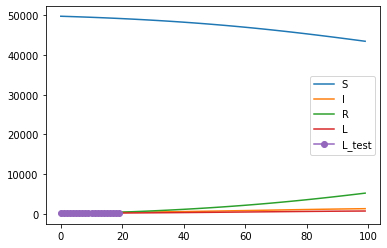

In [ ]:
#first node of first case
t_eval = np.linspace(0, 99, 100)
beta = [0.05, 0.1, 0.15000000000000002, 0.25]
array = np.concatenate((otwogroup[0], x['Ic_0'][0], np.array([0])))
ans = integrate.solve_ivp(ode_functionForPartB, (0,100), array, args = (beta,x['gamma']), t_eval=t_eval)


S = ans.y[:4]
I = ans.y[4:8]
R = ans.y[-1]

#compute L
L_vals = x['Lc']
L = []
for i in range(100):
    summ = 0
    for j in range(4):
        summ+=(I[j][i]*L_vals[j])
    L.append(summ)

    

S_sum = [np.sum(S, axis=0)]
I_sum = np.sum(I,axis=0)

plt.plot(S_sum[0], label='S')
plt.plot(I_sum, label='I')
plt.plot(R, label='R')
plt.plot(L, label='L')
plt.plot(x['L_test'][0], label = 'L_test', marker = 'o')
plt.legend()
plt.show()


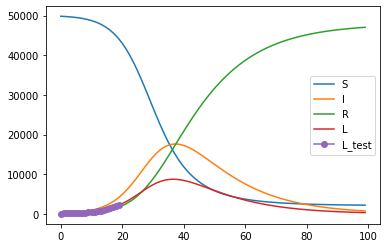

In [ ]:
#second case first node
t_eval = np.linspace(0, 99, 100)
beta = [0.2, 0.25, 0.30000000000000004, 0.4]
array = np.concatenate((ofourgroup[0], x['Ic_0'][5], np.array([0])))
ans = integrate.solve_ivp(ode_functionForPartB, (0,100), array, args = (beta,x['gamma']), t_eval=t_eval)


S = ans.y[:4]
I = ans.y[4:8]
R = ans.y[-1]

#compute L
L_vals = x['Lc']
L = []
for i in range(100):
    summ = 0
    for j in range(4):
        summ+=(I[j][i]*L_vals[j])
    L.append(summ)

    

S_sum = [np.sum(S, axis=0)]
I_sum = np.sum(I,axis=0)

plt.plot(S_sum[0], label='S')
plt.plot(I_sum, label='I')
plt.plot(R, label='R')
plt.plot(L, label='L')
plt.plot(x['L_test'][5], label = 'L_test', marker = 'o')
plt.legend()
plt.show()

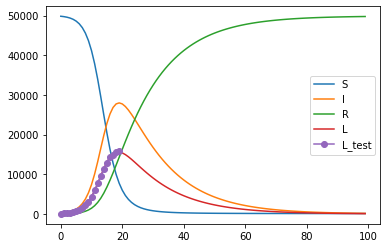

In [ ]:
#third case first node
t_eval = np.linspace(0, 99, 100)
beta = [0.4, 0.45, 0.5, 0.6000000000000001]
array = np.concatenate((osixgroup[0], x['Ic_0'][10], np.array([0])))
ans = integrate.solve_ivp(ode_functionForPartB, (0,100), array, args = (beta,x['gamma']), t_eval=t_eval)


S = ans.y[:4]
I = ans.y[4:8]
R = ans.y[-1]

#compute L
L_vals = x['Lc']
L = []
for i in range(100):
    summ = 0
    for j in range(4):
        summ+=(I[j][i]*L_vals[j])
    L.append(summ)

    

S_sum = [np.sum(S, axis=0)]
I_sum = np.sum(I,axis=0)

plt.plot(S_sum[0], label='S')
plt.plot(I_sum, label='I')
plt.plot(R, label='R')
plt.plot(L, label='L')
plt.plot(x['L_test'][10], label = 'L_test', marker = 'o')
plt.legend()
plt.show()

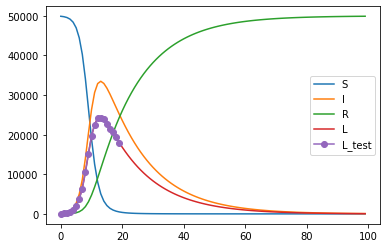

In [ ]:
t_eval = np.linspace(0, 99, 100)
beta = [0.45, 0.65, 0.75, 0.8500000000000001]
array = np.concatenate((oeightgroup[0], x['Ic_0'][15], np.array([0])))
ans = integrate.solve_ivp(ode_functionForPartB, (0,100), array, args = (beta,x['gamma']), t_eval=t_eval)


S = ans.y[:4]
I = ans.y[4:8]
R = ans.y[-1]

#compute L
L_vals = x['Lc']
L = []
for i in range(100):
    summ = 0
    for j in range(4):
        summ+=(I[j][i]*L_vals[j])
    L.append(summ)

    

S_sum = [np.sum(S, axis=0)]
I_sum = np.sum(I,axis=0)

plt.plot(S_sum[0], label='S')
plt.plot(I_sum, label='I')
plt.plot(R, label='R')
plt.plot(L, label='L')
plt.plot(x['L_test'][15], label = 'L_test', marker = 'o')
plt.legend()
plt.show()

## Conclusions

As we can see in our graphs, the L test values match with out actual values very well, indicating we computed correctly.